In [1]:
import xclim
import xarray as xr

In [2]:
def open_xrdataset(files, use_cftime=True, parallel=True, data_vars='minimal', chunks={'time':1}, 
                   coords='minimal', compat='override', drop=None, **kwargs):
    """optimized function for opening large cf datasets.
    based on https://github.com/pydata/xarray/issues/1385#issuecomment-561920115
    decode_timedelta=False is added to leave variables and coordinates with time units in 
    {“days”, “hours”, “minutes”, “seconds”, “milliseconds”, “microseconds”} encoded as numbers.   
    """
    def drop_all_coords(ds):
        return ds.reset_coords(drop=True)

    ds = xr.open_mfdataset(files, parallel=parallel, decode_times=False, combine='by_coords', 
                           preprocess=drop_all_coords, decode_cf=False, chunks=chunks,
                           data_vars=data_vars, coords=coords, compat=compat, **kwargs)

    return xr.decode_cf(ds, use_cftime=use_cftime, decode_timedelta=False)

In [3]:
idir="/pool/data/CORDEX/data/cordex/output/EUR-11/CLMcom/MPI-M-MPI-ESM-LR/rcp26/r1i1p1/CLMcom-BTU-CCLM4-8-17/v1/3hr"
file_str=idir+"/{}/v20180220/{}_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_CLMcom-BTU-CCLM4-8-17_v1_3hr_{}.nc"
t1 = "200701010130-200712312230"
t2 = "200701010000-200712312100"
t3 = "200701010000-200712312100"
rsds_file = file_str.format("rsds","rsds", t1)
rsus_file = file_str.format("rsus","rsus", t1)
rlds_file = file_str.format("rlds","rlds", t1)
rlus_file = file_str.format("rlus","rlus", t1)
tas_file = file_str.format("tas", "tas", t2)
sfcWind_file = file_str.format("sfcWind", "sfcWind", t3)
hurs_file = file_str.format("hurs", "hurs", t3)
rsds = open_xrdataset(rsds_file).rsds
rsus = open_xrdataset(rsus_file).rsus
rlds = open_xrdataset(rlds_file).rlds
rlus = open_xrdataset(rlus_file).rlus
tas = open_xrdataset(tas_file).tas
sfcWind = open_xrdataset(sfcWind_file).sfcWind
hurs = open_xrdataset(hurs_file).hurs

In [4]:
time="20070101"
rsds0101 = rsds.sel(time=time).compute()
rsus0101 = rsus.sel(time=time).compute()
rlds0101 = rlds.sel(time=time).compute()
rlus0101 = rlus.sel(time=time).compute()
tas0101 = tas.sel(time=time).compute()
sfcWind0101 = sfcWind.sel(time=time).compute()
hurs0101 = hurs.sel(time=time).compute()

In [5]:
rsds0101

<xarray.DataArray 'rsds' (time: 8, rlat: 412, rlon: 424)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[2.9072686e-07, 2.9037378e-07, 2.9008137e-07, ...,
         4.7928886e+01, 4.8709381e+01, 4.9502258e+01],
        [2.9261943e-07, 2.9240255e-07, 2.9220550e-07, ...,
         4.7790215e+01, 4.8573044e+01, 4.9364784e+01],
        [2.9454421e-07, 2.9443714e-07, 2.9433733e-07, ...,
         4.7639851e+01, 4.8424007e+01, 4.9227722e+01],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Coordinates:
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
  * time     (time) object 2007-01-01 01:30:00 ... 2007-01-01 22:30:00
    lat      (rlat, rlon) float64 21.99 22.03 22.07 22.11 ... 66.81 66.75 66.69
    lon      (rlat, rlon) float64 -10.06 -9.964 -9.864 ... 64.55 64.76 64.96
Attributes:
    long_name:      Surface Downwelling Shortwave Radiation
    units:          W m-2
    cell_methods:   time: mean
    standard_name:  surface_downwelling_shortwave_flux_in_air
    grid_mapping:   rotated_pole

In [6]:
rsds0101.cell_methods

'time: mean'

In [7]:
tas0101

<xarray.DataArray 'tas' (time: 8, rlat: 412, rlon: 424)>
array([[[286.30817, 286.24203, 286.1872 , ..., 296.05615, 295.87848,
         295.64508],
        [285.99875, 285.76547, 285.68048, ..., 296.0197 , 295.79388,
         295.52484],
        [285.85226, 285.51517, 285.2664 , ..., 295.99255, 295.7057 ,
         295.4195 ],
        ...,
        [267.64273, 267.30228, 267.7589 , ..., 260.09348, 258.24954,
         253.6081 ],
        [267.09863, 267.2596 , 268.1305 , ..., 259.2895 , 255.74223,
         255.56862],
        [266.57736, 267.09427, 268.41254, ..., 256.34256, 255.57207,
         254.38156]],

       [[284.10962, 284.07382, 284.05728, ..., 295.1284 , 294.93103,
         294.70505],
        [283.78485, 283.54007, 283.46783, ..., 295.0535 , 294.81976,
         294.5671 ],
        [283.66504, 283.2976 , 283.01886, ..., 294.97888, 294.7101 ,
         294.43747],
...
        [267.93515, 267.74966, 267.87604, ..., 260.32895, 257.568  ,
         253.07106],
        [267.5555 , 267.67563, 268.08868, ..., 258.4092 , 257.72885,
         254.79099],
        [267.28986, 267.88312, 268.58496, ..., 256.18405, 254.32315,
         253.52101]],

       [[284.33496, 284.33182, 284.34534, ..., 297.43863, 297.22025,
         296.97623],
        [284.14212, 284.02206, 284.0296 , ..., 297.44736, 297.16867,
         296.88113],
        [284.03583, 283.8599 , 283.7362 , ..., 297.47952, 297.0998 ,
         296.8068 ],
        ...,
        [267.28476, 267.71292, 267.78378, ..., 259.04825, 256.55927,
         253.34995],
        [267.27777, 267.6327 , 267.93048, ..., 258.32053, 256.58978,
         254.46988],
        [267.34738, 267.85254, 268.07343, ..., 255.45947, 253.83102,
         253.16388]]], dtype=float32)
Coordinates:
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
  * time     (time) object 2007-01-01 00:00:00 ... 2007-01-01 21:00:00
    lat      (rlat, rlon) float64 21.99 22.03 22.07 22.11 ... 66.81 66.75 66.69
    lon      (rlat, rlon) float64 -10.06 -9.964 -9.864 ... 64.55 64.76 64.96
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   time: point
    grid_mapping:   rotated_pole

In [8]:
tas0101.cell_methods

'time: point'

In [9]:
mrt_sun = xclim.indices.mean_radiant_temperature(rsds=rsds0101, 
                                                 rsus=rsus0101, 
                                                 rlds=rlds0101, 
                                                 rlus=rlus0101, 
                                                 stat="sunlit")

/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)
/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)
/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)
/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


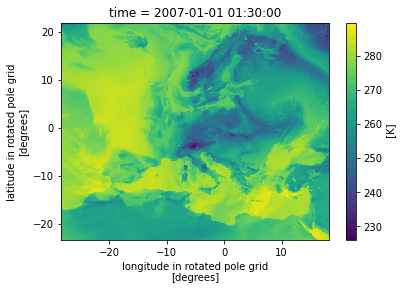

In [10]:
mrt_sun.isel(time=0).plot()

In [11]:
mrt_avg = xclim.indices.mean_radiant_temperature(rsds=rsds0101, 
                                                 rsus=rsus0101, 
                                                 rlds=rlds0101, 
                                                 rlus=rlus0101, 
                                                 stat="average")

/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)
/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


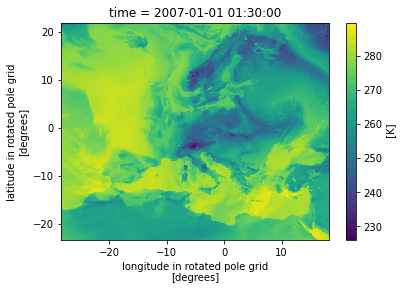

In [12]:
mrt_avg.isel(time=0).plot()

In [13]:
mrt_ins = xclim.indices.mean_radiant_temperature(rsds=rsds0101, 
                                                 rsus=rsus0101, 
                                                 rlds=rlds0101, 
                                                 rlus=rlus0101, 
                                                 stat="instant")

/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)
/home/g/g300100/.conda/envs/xclim/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


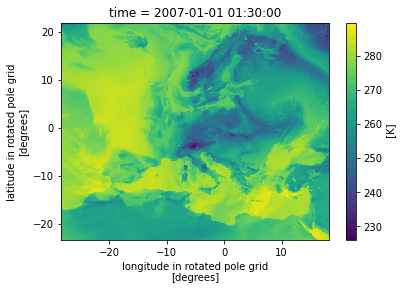

In [14]:
mrt_ins.isel(time=0).plot()

In [15]:
#mrt_sun.cell_methods
#mrt_avg.cell_methods
mrt_ins.cell_methods

AttributeError: 'DataArray' object has no attribute 'cell_methods'

In [16]:
utci_sun = xclim.indices.universal_thermal_climate_index(tas=tas0101, 
                                                         hurs=hurs0101, 
                                                         sfcWind=sfcWind0101, 
                                                         tmrt=mrt_sun)

In [17]:
utci_sun

<xarray.DataArray 'tas' (time: 0, rlat: 412, rlon: 424)>
array([], shape=(0, 412, 424), dtype=float64)
Coordinates:
  * time     (time) object 
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
    lat      (rlat, rlon) float64 21.99 22.03 22.07 22.11 ... 66.81 66.75 66.69
    lon      (rlat, rlon) float64 -10.06 -9.964 -9.864 ... 64.55 64.76 64.96
    height   float64 10.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          °C
    cell_methods:   time: point
    grid_mapping:   rotated_pole

In [18]:
utci_avg = xclim.indices.universal_thermal_climate_index(tas=tas0101, 
                                                         hurs=hurs0101, 
                                                         sfcWind=sfcWind0101, 
                                                         tmrt=mrt_avg)

In [19]:
utci_avg

<xarray.DataArray 'tas' (time: 0, rlat: 412, rlon: 424)>
array([], shape=(0, 412, 424), dtype=float64)
Coordinates:
  * time     (time) object 
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
    lat      (rlat, rlon) float64 21.99 22.03 22.07 22.11 ... 66.81 66.75 66.69
    lon      (rlat, rlon) float64 -10.06 -9.964 -9.864 ... 64.55 64.76 64.96
    height   float64 10.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          °C
    cell_methods:   time: point
    grid_mapping:   rotated_pole

In [20]:
utci_ins = xclim.indices.universal_thermal_climate_index(tas=tas0101, 
                                                         hurs=hurs0101, 
                                                         sfcWind=sfcWind0101, 
                                                         tmrt=mrt_ins)

In [21]:
utci_ins

<xarray.DataArray 'tas' (time: 0, rlat: 412, rlon: 424)>
array([], shape=(0, 412, 424), dtype=float64)
Coordinates:
  * time     (time) object 
  * rlon     (rlon) float64 -28.38 -28.26 -28.16 -28.05 ... 17.93 18.05 18.16
  * rlat     (rlat) float64 -23.38 -23.26 -23.16 -23.05 ... 21.61 21.73 21.83
    lat      (rlat, rlon) float64 21.99 22.03 22.07 22.11 ... 66.81 66.75 66.69
    lon      (rlat, rlon) float64 -10.06 -9.964 -9.864 ... 64.55 64.76 64.96
    height   float64 10.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          °C
    cell_methods:   time: point
    grid_mapping:   rotated_pole

In [22]:
utci_sun.time

<xarray.DataArray 'time' (time: 0)>
array([], dtype=object)
Coordinates:
  * time     (time) object 
    height   float64 10.0
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T